# 📊 Análisis Exploratorio de Datos (EDA)

**Proyecto Final de Maestría - UEES**  
**Validación automática de etiquetas de red mediante visión computacional - Cajas MPLS**

👤 Autores: María Augusta Flores y Marcelo Ismael Andrade  
📅 Fecha: Septiembre del 2025


## 🧾 Descripción del Proyecto y Objetivos del EDA

### 🗂️ Nombre del Proyecto
**Validación automática de etiquetas de red mediante visión computacional - Cajas MPLS**

### 📑 Descripción del Dataset
Este dataset contiene más de 1000 registros de etiquetas utilizadas en cajas MPLS de redes de fibra óptica. Cada etiqueta está compuesta por varios campos codificados, como ciudad, nodo concentrador, nodo estándar, ruta, código de caja y color de buffer. Los datos fueron extraídos de sistemas internos de la empresa y reflejan configuraciones reales en campo.

### 🎯 Objetivos del EDA

- Entender la estructura y distribución de las variables contenidas en las etiquetas.
- Identificar patrones frecuentes, posibles errores o inconsistencias en la información codificada.
- Detectar valores atípicos o anomalías que podrían afectar el entrenamiento de un modelo de IA.
- Proveer recomendaciones de limpieza y preprocesamiento para el diseño de un sistema automático de validación de etiquetas.

### 📚 1. Importación de Librerías
Las siguientes librerías son utilizadas a lo largo del análisis:

```python
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
```


### 📚 1. Importación de Librerías

A continuación se importan las librerías necesarias para el análisis exploratorio de datos. Cada una cumple un propósito específico en el flujo de trabajo:

```python
import pandas as pd        # Permite cargar, manipular y analizar datos tabulares (estructurados como DataFrame).
import seaborn as sns      # Librería especializada en visualización estadística; usada para gráficos de barras, heatmaps, etc.
import matplotlib.pyplot as plt  # Complementa a Seaborn y permite configurar gráficos detalladamente (títulos, tamaños, etiquetas).
```


In [32]:
# 📥 Cargar librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 📂 Cargar dataset limpio
df = pd.read_csv('/content/dataset_etiquetas_cajas_mpls.csv')

In [33]:
# 👀 Primeras y últimas filas
print("🔍 Primeras filas:")
display(df.head())

print("🔍 Últimas filas:")
display(df.tail())

🔍 Primeras filas:


,N,Etiqueta,TS,ciudad,nodo_concentrador,nodo_estandar,nodo_backup,ruta,caja_codigo,color_buffer
0,1,UIO-Gosseal (A)-Whymper (E)(B)/Whymper (E)(A)-...,UIO,UIO,Gosseal (A),Whymper (E)(B),Whymper (E)(A),F02,PE16B,CAF
1,2,UIO-Gosseal (A)-Whymper (E)(A)/Whymper (E)(B)-...,UIO,UIO,Gosseal (A),Whymper (E)(A),Whymper (E)(B),F02,PE15B,CAF
2,3,UIO-Gosseal (A)-Whymper (E)(B)/Whymper (E)(A)-...,UIO,UIO,Gosseal (A),Whymper (E)(B),Whymper (E)(A),F02,PE14B,CAF
3,4,UIO-Gosseal (A)-Whymper (E)(A)/Whymper (E)(B)-...,UIO,UIO,Gosseal (A),Whymper (E)(A),Whymper (E)(B),F02,PE13B,CAF
4,5,UIO-Gosseal (A)-Whymper (E)(B)/Whymper (E)(A)-...,UIO,UIO,Gosseal (A),Whymper (E)(B),Whymper (E)(A),F02,PE12B,VER


🔍 Últimas filas:


,N,Etiqueta,TS,ciudad,nodo_concentrador,nodo_estandar,nodo_backup,ruta,caja_codigo,color_buffer
995,996,MOT-Manta SDH (A)-Los Bajos (E)/N/A-F02-PC12B-CAF,MNT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,997,MOT-Manta SDH (A)-Los Bajos (E)/N/A-F02-PC11B-CAF,MNT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,998,MOT-Manta SDH (A)-Los Bajos (E)/N/A-F02-PC10B-CAF,MNT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,999,MOT-Manta SDH (A)-Los Bajos (E)/N/A-F02-PC09B-VER,MNT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999,1000,MOT-Manta SDH (A)-Los Bajos (E)/N/A-F02-PC08B-VER,MNT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# ℹ️ Información general del dataset
df.info()
print(f"📐 Dimensiones: {df.shape[0]} filas × {df.shape[1]} columnas")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   N                  1000 non-null   int64 
 1   Etiqueta           1000 non-null   object
 2   TS                 1000 non-null   object
 3   ciudad             723 non-null    object
 4   nodo_concentrador  722 non-null    object
 5   nodo_estandar      723 non-null    object
 6   nodo_backup        722 non-null    object
 7   ruta               723 non-null    object
 8   caja_codigo        723 non-null    object
 9   color_buffer       723 non-null    object
dtypes: int64(1), object(9)
memory usage: 78.3+ KB
📐 Dimensiones: 1000 filas × 10 columnas


In [35]:
# ⚠️ Verificación de valores faltantes
print("🔎 Valores nulos por columna:")
print(df.isnull().sum())

🔎 Valores nulos por columna:
N                      0
Etiqueta               0
TS                     0
ciudad               277
nodo_concentrador    278
nodo_estandar        277
nodo_backup          278
ruta                 277
caja_codigo          277
color_buffer         277
dtype: int64


In [36]:
# 📊 Estadísticas básicas de variables
df.describe(include='all')

,N,Etiqueta,TS,ciudad,nodo_concentrador,nodo_estandar,nodo_backup,ruta,caja_codigo,color_buffer
count,1000.000000,1000,1000,723,722,723,722,723,723,723
unique,NaN,1000,4,7,10,28,26,5,196,12
top,NaN,MOT-Manta SDH (A)-Los Bajos (E)/N/A-F02-PC08B-VER,UIO,GYE,Bellavista (A),Alborada 1(E),Alborada 3(E),F01,PC07B,CAF
freq,NaN,1,250,222,214,70,70,302,13,76
mean,500.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,288.819436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,250.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,500.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,750.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2️⃣ Análisis Univariado

### 🎨 Colores de buffer de la caja (`color_buffer`)

In [37]:
# 📊 Frecuencia absoluta y relativa – color_buffer
print("📊 Frecuencia absoluta:")
print(df['color_buffer'].value_counts())

print("\n📊 Frecuencia relativa (%):")
print((df['color_buffer'].value_counts(normalize=True) * 100).round(2))

📊 Frecuencia absoluta:
color_buffer
CAF    76
VER    74
GRI    69
ROS    69
NEG    68
CEL    68
VIO    67
AMA    64
ROJ    59
BLA    58
NAR    29
AZU    22
Name: count, dtype: int64

📊 Frecuencia relativa (%):
color_buffer
CAF    10.51
VER    10.24
GRI     9.54
ROS     9.54
NEG     9.41
CEL     9.41
VIO     9.27
AMA     8.85
ROJ     8.16
BLA     8.02
NAR     4.01
AZU     3.04
Name: proportion, dtype: float64


/tmp/ipython-input-1430674829.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='color_buffer', order=df['color_buffer'].value_counts().index, palette='Set2')


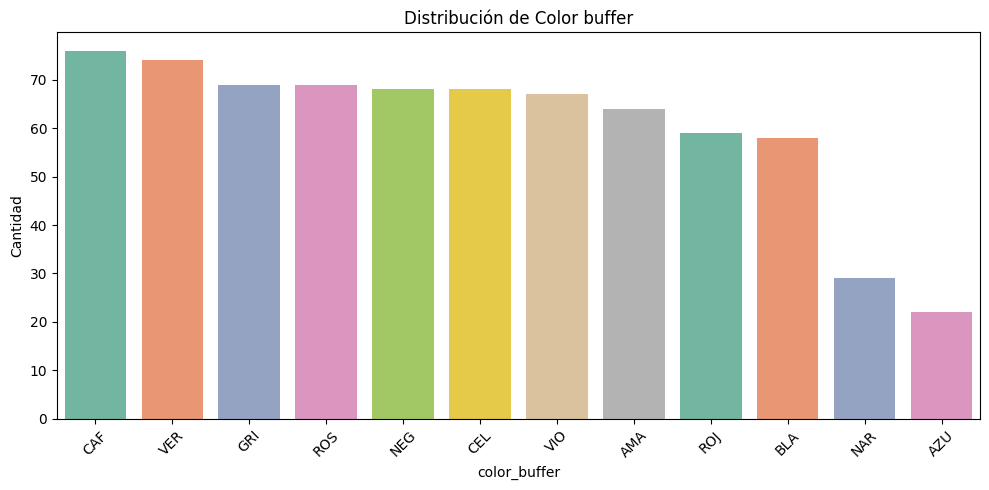

In [38]:
# 📈 Gráfico de barras – color_buffer
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='color_buffer', order=df['color_buffer'].value_counts().index, palette='Set2')
plt.title("Distribución de Color buffer")
plt.xlabel("color_buffer")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 🏙️ Ciudad de origen de la caja (`ciudad`)

In [39]:
# 📊 Frecuencia absoluta y relativa – ciudad
print("📊 Frecuencia absoluta:")
print(df['ciudad'].value_counts())

print("\n📊 Frecuencia relativa (%):")
print((df['ciudad'].value_counts(normalize=True) * 100).round(2))

📊 Frecuencia absoluta:
ciudad
GYE    222
CUE    214
JIP    120
UIO    102
PVO     40
STA     24
MOT      1
Name: count, dtype: int64

📊 Frecuencia relativa (%):
ciudad
GYE    30.71
CUE    29.60
JIP    16.60
UIO    14.11
PVO     5.53
STA     3.32
MOT     0.14
Name: proportion, dtype: float64


/tmp/ipython-input-1898641568.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='ciudad', order=df['ciudad'].value_counts().index, palette='Set2')


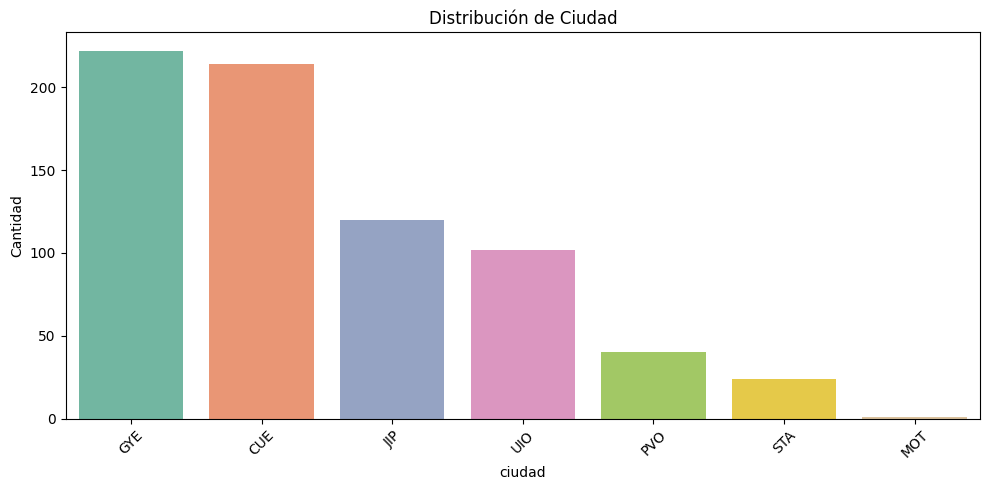

In [40]:
# 📈 Gráfico de barras – ciudad
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='ciudad', order=df['ciudad'].value_counts().index, palette='Set2')
plt.title("Distribución de Ciudad")
plt.xlabel("ciudad")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 📡 Nodo concentrador principal (`nodo_concentrador`)

In [41]:
# 📊 Frecuencia absoluta y relativa – nodo_concentrador
print("📊 Frecuencia absoluta:")
print(df['nodo_concentrador'].value_counts())

print("\n📊 Frecuencia relativa (%):")
print((df['nodo_concentrador'].value_counts(normalize=True) * 100).round(2))

📊 Frecuencia absoluta:
nodo_concentrador
Bellavista (A)    214
Kennedy 1(A)      139
Parrales (A)      120
Portoviejo (A)     64
Progreso (A)       60
Sur 2 (A)          59
Armenia (A)        27
Centro 1(A)        22
Gosseal (A)        16
Manta SDH (A)       1
Name: count, dtype: int64

📊 Frecuencia relativa (%):
nodo_concentrador
Bellavista (A)    29.64
Kennedy 1(A)      19.25
Parrales (A)      16.62
Portoviejo (A)     8.86
Progreso (A)       8.31
Sur 2 (A)          8.17
Armenia (A)        3.74
Centro 1(A)        3.05
Gosseal (A)        2.22
Manta SDH (A)      0.14
Name: proportion, dtype: float64


/tmp/ipython-input-3836129883.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='nodo_concentrador', order=df['nodo_concentrador'].value_counts().index, palette='Set2')


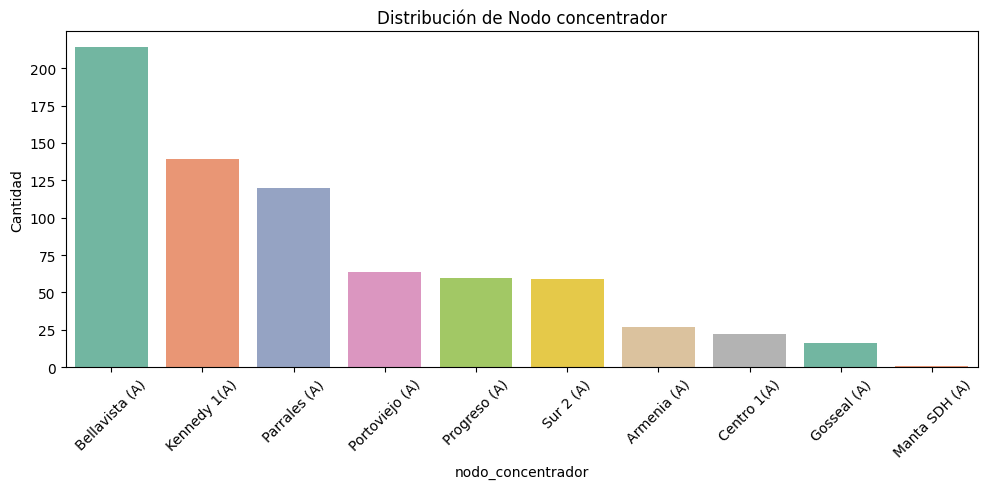

In [42]:
# 📈 Gráfico de barras – nodo_concentrador
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='nodo_concentrador', order=df['nodo_concentrador'].value_counts().index, palette='Set2')
plt.title("Distribución de Nodo concentrador")
plt.xlabel("nodo_concentrador")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 🧭 Nodo estándar asignado (`nodo_estandar`)

In [43]:
# 📊 Frecuencia absoluta y relativa – nodo_estandar
print("📊 Frecuencia absoluta:")
print(df['nodo_estandar'].value_counts())

print("\n📊 Frecuencia relativa (%):")
print((df['nodo_estandar'].value_counts(normalize=True) * 100).round(2))

📊 Frecuencia absoluta:
nodo_estandar
Alborada 1(E)                     70
Alborada 3(E)                     69
Mall del Rio (E)                  62
Control Sur (E)                   62
Jipijapa SDH (A)                  60
Parrales (A)                      60
Bibin (E)(A)                      32
Bibin (E)(B)                      32
Progreso (A)(B)                   30
Progreso (A)(A)                   30
Sur 2 (A)                         29
Recreo (E)                        20
San Alejo (E)(A)                  20
San Alejo (E)(B)                  20
San Pedro (E)(B)                  14
San Pedro (E)(A)                  12
Ayacucho (E)(A)                   12
Ayacucho (E)(B)                   12
Polideportivo Huancavilca 1(E)    11
Centro 1(A)                       11
Vilatuna (E)                      11
Solanda (E)                       10
Whymper (E)(A)                     8
Whymper (E)(B)                     8
Pintag (E)                         8
San Nicolas (E)                    8
K

/tmp/ipython-input-1641211870.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='nodo_estandar', order=df['nodo_estandar'].value_counts().index, palette='Set2')


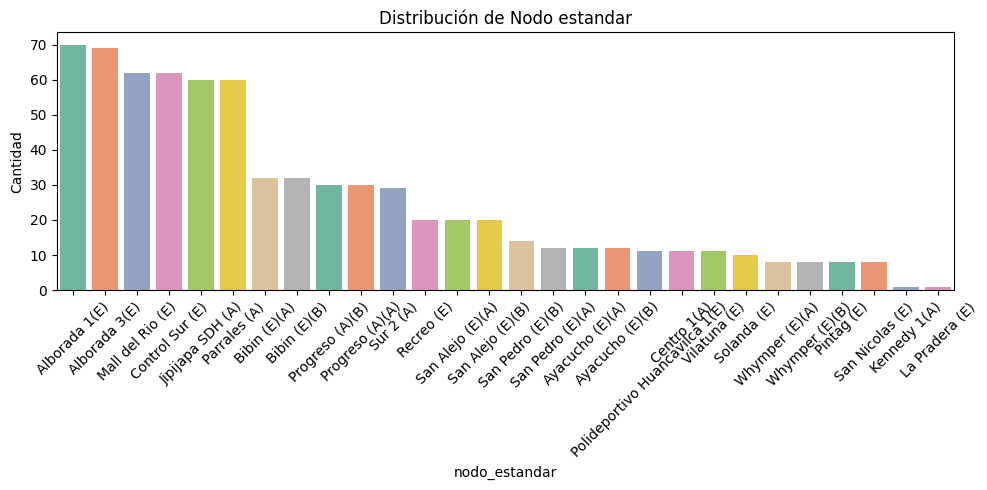

In [44]:
# 📈 Gráfico de barras – nodo_estandar
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='nodo_estandar', order=df['nodo_estandar'].value_counts().index, palette='Set2')
plt.title("Distribución de Nodo estandar")
plt.xlabel("nodo_estandar")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 🛡️ Nodo de respaldo (backup) (`nodo_backup`)

In [45]:
# 📊 Frecuencia absoluta y relativa – nodo_backup
print("📊 Frecuencia absoluta:")
print(df['nodo_backup'].value_counts())

print("\n📊 Frecuencia relativa (%):")
print((df['nodo_backup'].value_counts(normalize=True) * 100).round(2))

📊 Frecuencia absoluta:
nodo_backup
Alborada 3(E)                     70
Alborada 1(E)                     69
Control Sur (E)                   62
Mall del Rio (E)                  62
Parrales (A)                      60
Jipijapa SDH (A)                  60
Bibin (E)(B)                      32
Bibin (E)(A)                      32
Progreso (A)(A)                   30
Sur 2 (A)                         30
Progreso (A)(B)                   30
San Alejo (E)(A)                  20
San Alejo (E)(B)                  20
Recreo (E)                        20
Pintag (E)                        19
San Pedro (E)(A)                  14
San Pedro (E)(B)                  12
Ayacucho (E)(A)                   12
Ayacucho (E)(B)                   12
Centro 1(A)                       11
Polideportivo Huancavilca 1(E)    11
Solanda (E)                        9
San Nicolas (E)                    8
Whymper (E)(B)                     8
Whymper (E)(A)                     8
San Andres (E)                     1
Nam

/tmp/ipython-input-1288289376.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='nodo_backup', order=df['nodo_backup'].value_counts().index, palette='Set2')


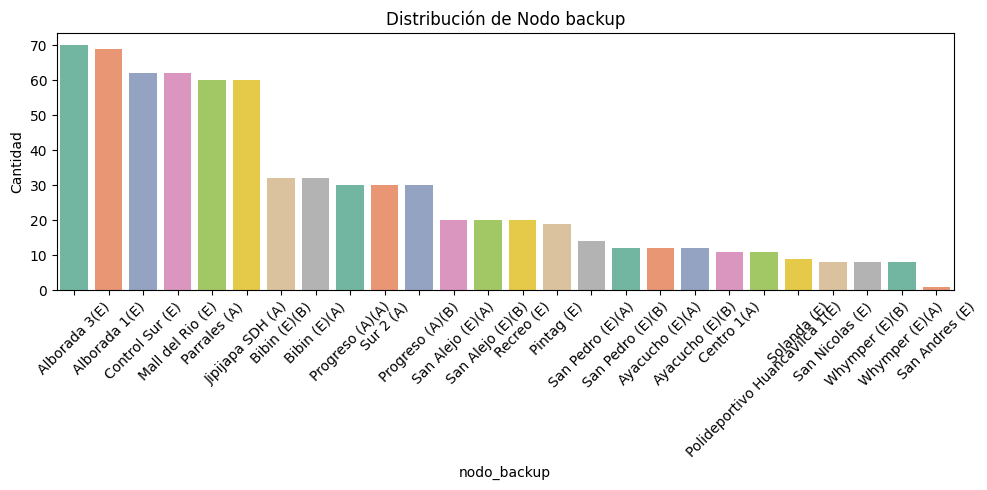

In [46]:
# 📈 Gráfico de barras – nodo_backup
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='nodo_backup', order=df['nodo_backup'].value_counts().index, palette='Set2')
plt.title("Distribución de Nodo backup")
plt.xlabel("nodo_backup")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 🛤️ Ruta asignada (FXX) (`ruta`)

In [47]:
# 📊 Frecuencia absoluta y relativa – ruta
print("📊 Frecuencia absoluta:")
print(df['ruta'].value_counts())

print("\n📊 Frecuencia relativa (%):")
print((df['ruta'].value_counts(normalize=True) * 100).round(2))

📊 Frecuencia absoluta:
ruta
F01    302
F03    163
F02    138
F04    100
F05     20
Name: count, dtype: int64

📊 Frecuencia relativa (%):
ruta
F01    41.77
F03    22.54
F02    19.09
F04    13.83
F05     2.77
Name: proportion, dtype: float64


/tmp/ipython-input-3954400994.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='ruta', order=df['ruta'].value_counts().index, palette='Set2')


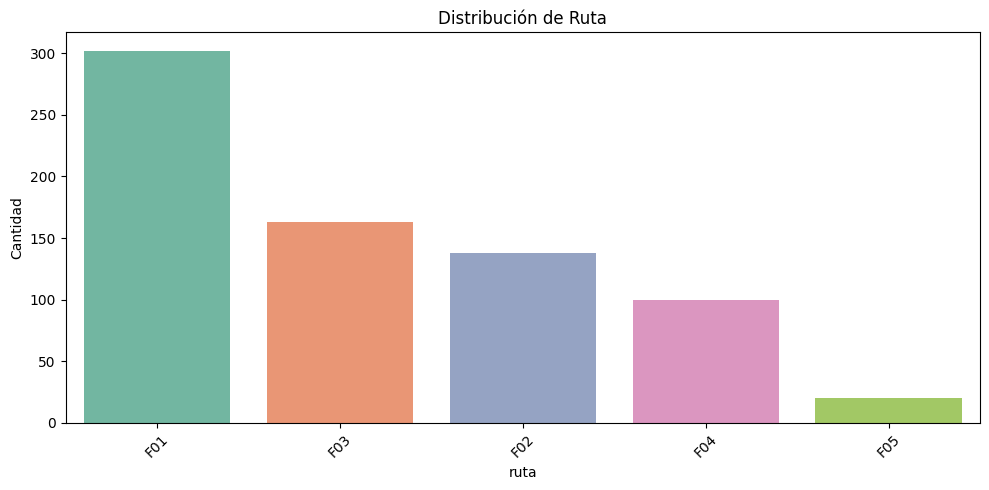

In [48]:
# 📈 Gráfico de barras – ruta
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='ruta', order=df['ruta'].value_counts().index, palette='Set2')
plt.title("Distribución de Ruta")
plt.xlabel("ruta")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 📦 Código de caja MPLS (`caja_codigo`)

In [49]:
# 📊 Frecuencia absoluta y relativa – caja_codigo
print("📊 Frecuencia absoluta:")
print(df['caja_codigo'].value_counts())

print("\n📊 Frecuencia relativa (%):")
print((df['caja_codigo'].value_counts(normalize=True) * 100).round(2))

📊 Frecuencia absoluta:
caja_codigo
PC07B    13
PC03B    13
PC21B    13
PC20B    13
PC19B    13
         ..
P02A      1
P15B      1
P18B      1
PC33      1
PC35      1
Name: count, Length: 196, dtype: int64

📊 Frecuencia relativa (%):
caja_codigo
PC07B    1.80
PC03B    1.80
PC21B    1.80
PC20B    1.80
PC19B    1.80
         ... 
P02A     0.14
P15B     0.14
P18B     0.14
PC33     0.14
PC35     0.14
Name: proportion, Length: 196, dtype: float64


/tmp/ipython-input-1681122590.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='caja_codigo', order=df['caja_codigo'].value_counts().index, palette='Set2')


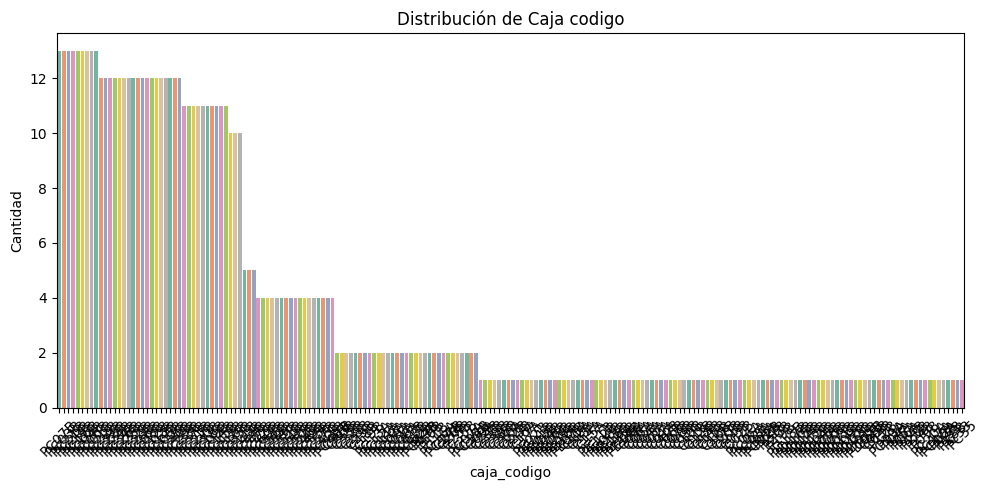

In [50]:
# 📈 Gráfico de barras – caja_codigo
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='caja_codigo', order=df['caja_codigo'].value_counts().index, palette='Set2')
plt.title("Distribución de Caja codigo")
plt.xlabel("caja_codigo")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3️⃣ Análisis Bivariado

En esta sección se exploran relaciones entre variables categóricas del dataset para identificar patrones conjuntos o dependencias. Aunque no contamos aún con una variable objetivo numérica, podemos analizar combinaciones relevantes que podrían ser útiles para el diseño del modelo de validación de etiquetas.

### 🎨 `color_buffer` vs 🏙️ `ciudad`

In [51]:
# 📊 Conteo conjunto de color y ciudad
pd.crosstab(df['color_buffer'], df['ciudad'])

ciudad,CUE,GYE,JIP,MOT,PVO,STA,UIO
color_buffer,,,,,,,
AMA,18,22,12,0,4,0,8
AZU,2,2,0,0,0,6,12
BLA,20,20,12,0,4,0,2
CAF,21,22,12,0,4,6,11
CEL,20,22,12,0,4,0,10
GRI,21,22,12,1,4,0,9
NAR,9,2,0,0,0,6,12
NEG,21,22,12,0,4,0,9
ROJ,21,20,12,0,4,0,2


/tmp/ipython-input-3540212131.py:8: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


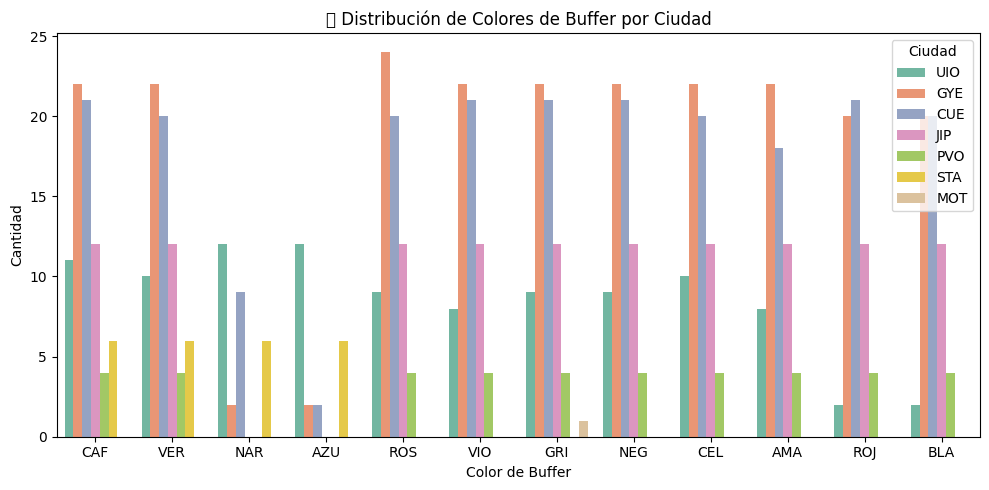

In [52]:
# 📈 Gráfico: color_buffer según ciudad
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='color_buffer', hue='ciudad', palette='Set2')
plt.title("🎨 Distribución de Colores de Buffer por Ciudad")
plt.xlabel("Color de Buffer")
plt.ylabel("Cantidad")
plt.legend(title="Ciudad")
plt.tight_layout()
plt.show()

### 🎨 `color_buffer` vs 🛤️ `ruta`

/tmp/ipython-input-1743198024.py:9: UserWarning: Glyph 128740 (\N{RAILWAY TRACK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128740 (\N{RAILWAY TRACK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


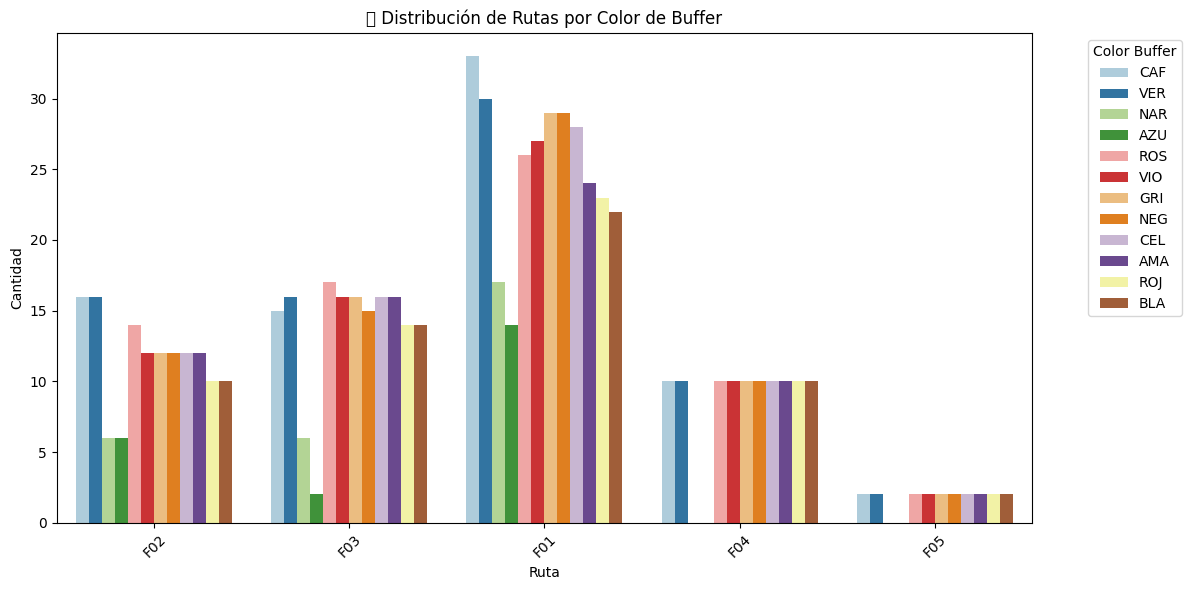

In [53]:
# 📈 Gráfico: color_buffer según ruta
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='ruta', hue='color_buffer', palette='Paired')
plt.title("🛤️ Distribución de Rutas por Color de Buffer")
plt.xlabel("Ruta")
plt.ylabel("Cantidad")
plt.legend(title="Color Buffer", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 🏙️ `ciudad` vs 📡 `nodo_concentrador`

/tmp/ipython-input-586181146.py:10: UserWarning: Glyph 128225 (\N{SATELLITE ANTENNA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128225 (\N{SATELLITE ANTENNA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


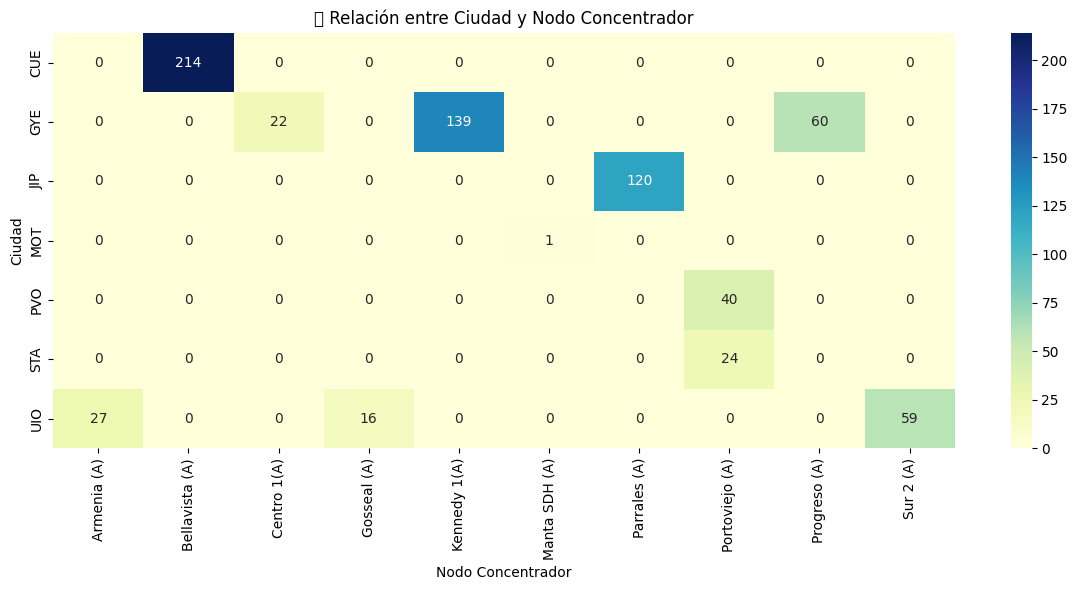

In [54]:
# 📊 Tabla cruzada ciudad vs nodo concentrador
tabla = pd.crosstab(df['ciudad'], df['nodo_concentrador'])

# 🔥 Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(tabla, cmap="YlGnBu", annot=True, fmt='d')
plt.title("📡 Relación entre Ciudad y Nodo Concentrador")
plt.xlabel("Nodo Concentrador")
plt.ylabel("Ciudad")
plt.tight_layout()
plt.show()

### 🧭 `nodo_estandar` vs 🛡️ `nodo_backup`

/tmp/ipython-input-3721719861.py:10: UserWarning: Glyph 129517 (\N{COMPASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129517 (\N{COMPASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


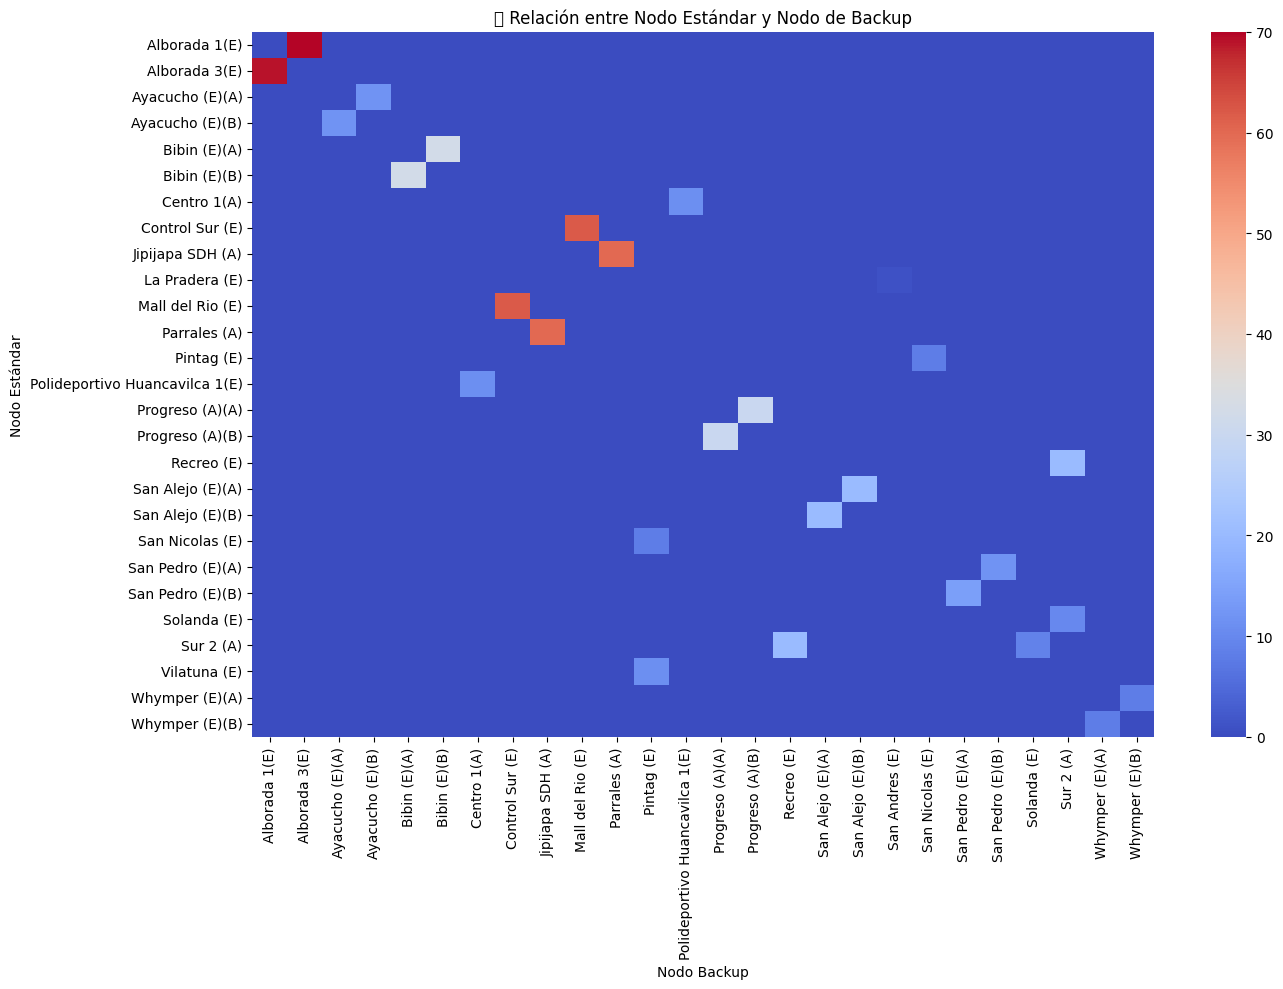

In [55]:
# 📊 Tabla cruzada nodo estándar vs backup
tabla2 = pd.crosstab(df['nodo_estandar'], df['nodo_backup'])

# 🔥 Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(tabla2, cmap="coolwarm", annot=False)
plt.title("🧭 Relación entre Nodo Estándar y Nodo de Backup")
plt.xlabel("Nodo Backup")
plt.ylabel("Nodo Estándar")
plt.tight_layout()
plt.show()

## 4️⃣ Análisis Multivariado

El análisis multivariado permite visualizar combinaciones de más de dos variables a la vez para descubrir patrones complejos, asociaciones cruzadas y segmentos de interés dentro del dataset. Aunque las variables son categóricas, podemos usar gráficos segmentados y agrupaciones para representar insights multidimensionales.

### 🎨 `color_buffer` según 🏙️ `ciudad` y 🛤️ `ruta` (Gráfico agrupado)

/tmp/ipython-input-3022628240.py:9: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


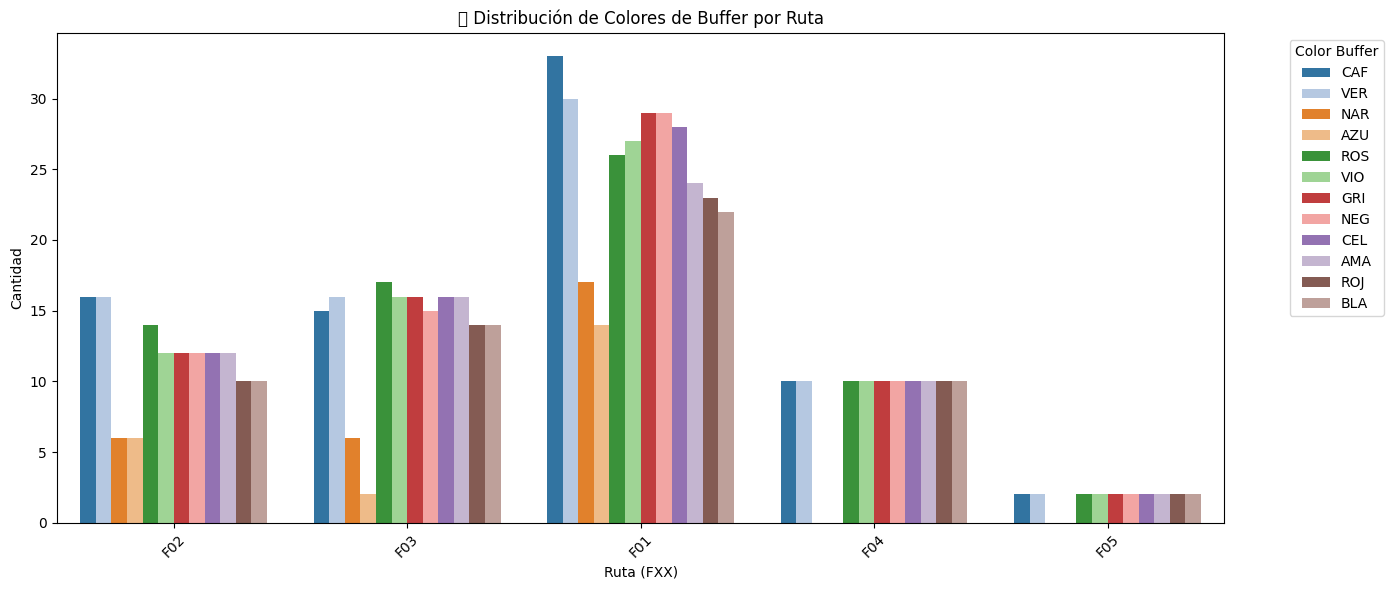

In [56]:
# 📊 Conteo agrupado: ciudad, ruta y color
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='ruta', hue='color_buffer', palette='tab20', dodge=True)
plt.title("🎨 Distribución de Colores de Buffer por Ruta")
plt.xlabel("Ruta (FXX)")
plt.ylabel("Cantidad")
plt.legend(title="Color Buffer", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 🏙️ `ciudad` + 📡 `nodo_concentrador` + 🎨 `color_buffer`

/tmp/ipython-input-2614144881.py:10: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


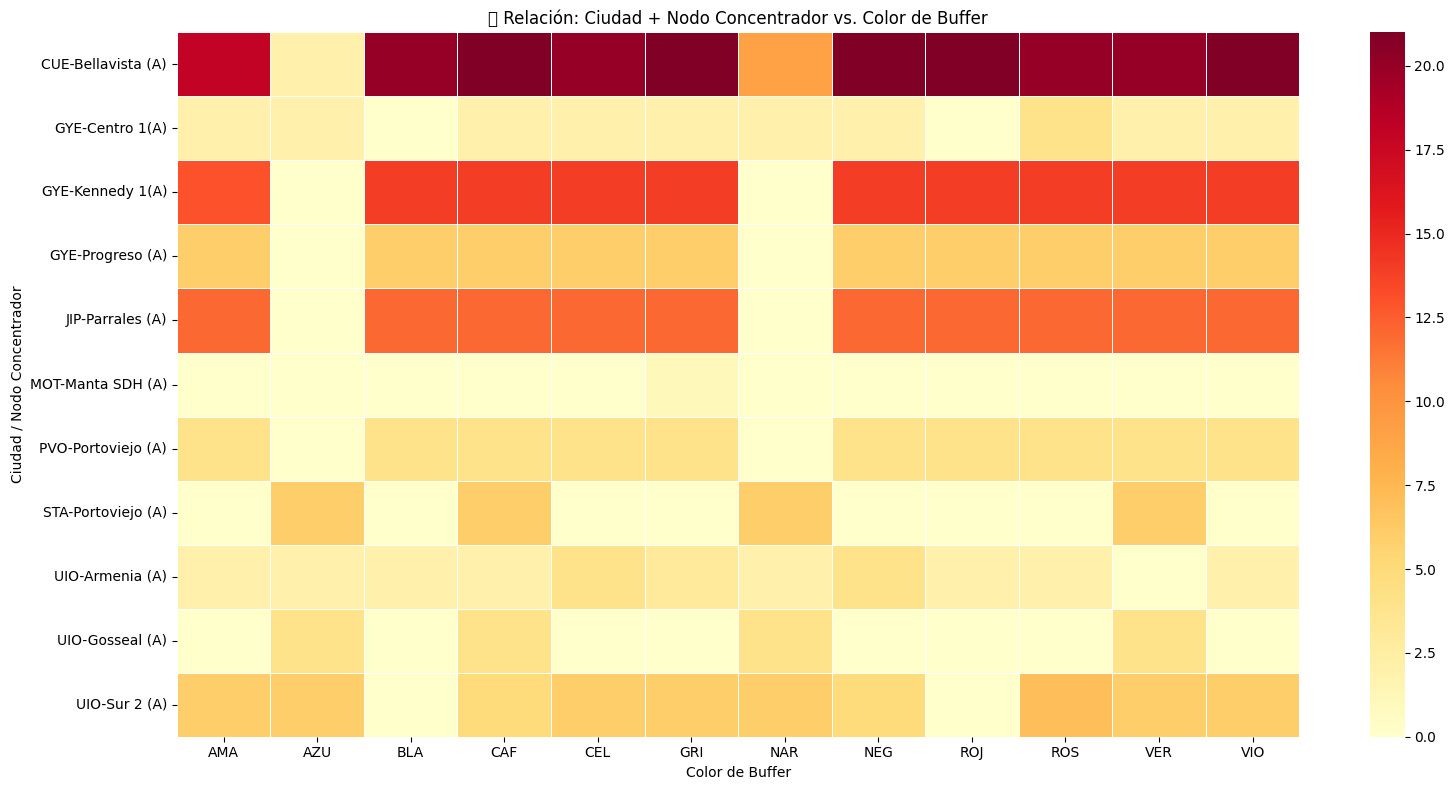

In [57]:
# 💡 Agrupación por ciudad, nodo y color
tabla3 = pd.crosstab([df['ciudad'], df['nodo_concentrador']], df['color_buffer'])

# 🔥 Heatmap multivariado
plt.figure(figsize=(16, 8))
sns.heatmap(tabla3, cmap="YlOrRd", linewidths=.5)
plt.title("📊 Relación: Ciudad + Nodo Concentrador vs. Color de Buffer")
plt.xlabel("Color de Buffer")
plt.ylabel("Ciudad / Nodo Concentrador")
plt.tight_layout()
plt.show()

### 📦 Distribución de `caja_codigo` por 🏙️ `ciudad` y 🛤️ `ruta`

/tmp/ipython-input-3900611070.py:9: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


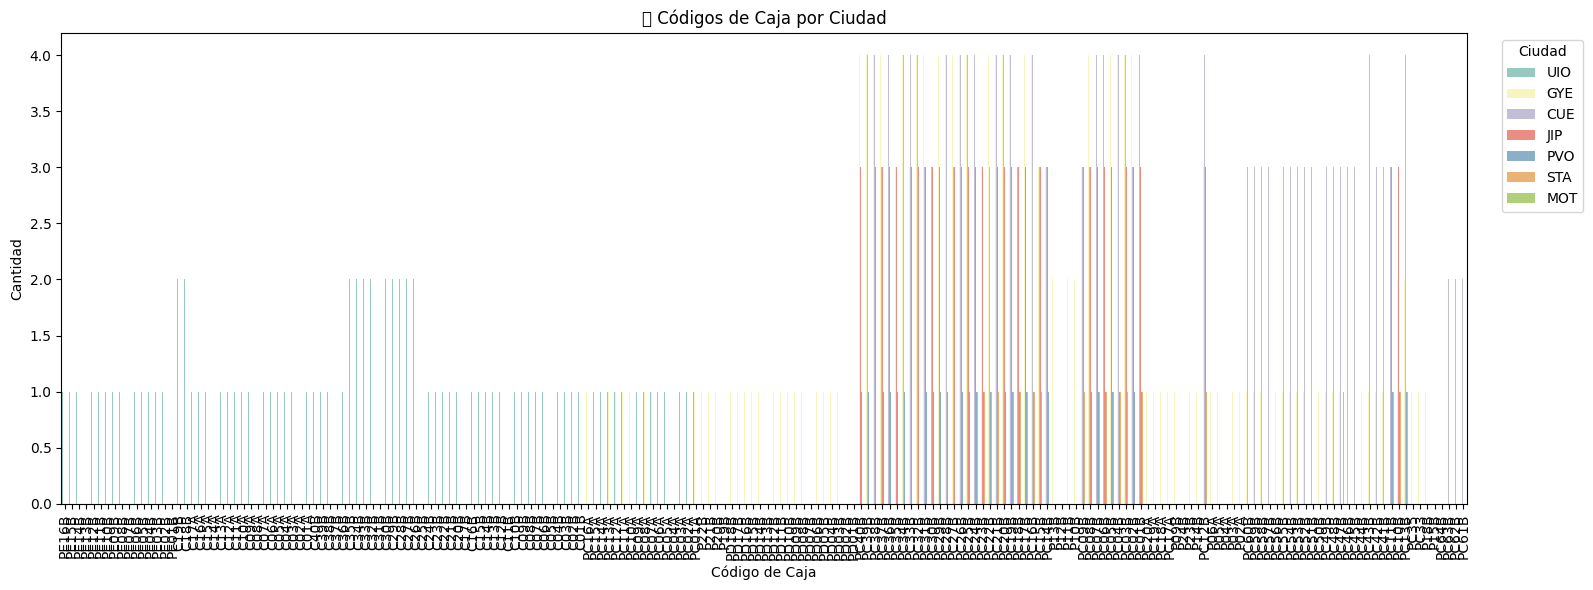

In [58]:
# ⚙️ Conteo de cajas por ciudad y ruta
plt.figure(figsize=(16, 6))
sns.countplot(data=df, x='caja_codigo', hue='ciudad', palette='Set3')
plt.title("📦 Códigos de Caja por Ciudad")
plt.xlabel("Código de Caja")
plt.ylabel("Cantidad")
plt.legend(title="Ciudad", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## 5️⃣ Identificación de Patrones y Anomalías

Esta sección tiene como objetivo identificar valores atípicos, distribuciones anómalas y posibles inconsistencias en los datos, lo cual es crucial para el preprocesamiento y entrenamiento robusto de modelos de IA. Aunque no se cuenta con una variable continua para aplicar métodos estadísticos clásicos, se pueden detectar anomalías en la frecuencia y estructura de los datos categóricos.

### ❌ Validación de colores fuera de estándar

In [59]:
# 🎨 Lista oficial de colores válidos
colores_validos = ['ROJ', 'BLA', 'CAF', 'VER', 'NAR', 'AZU',
                   'ROS', 'VIO', 'GRI', 'NEG', 'CEL', 'AMA']

# 🔎 Colores que no están en la lista oficial
colores_encontrados = df['color_buffer'].dropna().unique()
colores_invalidos = [c for c in colores_encontrados if c not in colores_validos]

print("🎯 Colores encontrados:", colores_encontrados)
print("❌ Colores no válidos:", colores_invalidos)


🎯 Colores encontrados: ['CAF' 'VER' 'NAR' 'AZU' 'ROS' 'VIO' 'GRI' 'NEG' 'CEL' 'AMA' 'ROJ' 'BLA']
❌ Colores no válidos: []


### 📉 Rutas atípicas o con baja frecuencia

In [60]:
# 🔎 Frecuencia de rutas
frecuencias_rutas = df['ruta'].value_counts()
print(frecuencias_rutas.tail(10))  # Mostrar las menos comunes


ruta
F01    302
F03    163
F02    138
F04    100
F05     20
Name: count, dtype: int64


### 🔁 Detección de combinaciones duplicadas sospechosas (`caja_codigo` + `color_buffer`)

In [61]:
# 🚨 Buscar duplicados exactos de combinaciones
duplicados = df.duplicated(subset=['caja_codigo', 'color_buffer'], keep=False)
df[duplicados].sort_values(by='caja_codigo')


,N,Etiqueta,TS,ciudad,nodo_concentrador,nodo_estandar,nodo_backup,ruta,caja_codigo,color_buffer
353,354,GYE-Kennedy 1(A)-Alborada 3(E)/Alborada 1(E)-F...,GYE,GYE,Kennedy 1(A),Alborada 3(E),Alborada 1(E),F03,P10B,GRI
302,303,GYE-Kennedy 1(A)-Alborada 3(E)/Alborada 1(E)-F...,GYE,GYE,Kennedy 1(A),Alborada 3(E),Alborada 1(E),F04,P10B,GRI
301,302,GYE-Kennedy 1(A)-Alborada 1(E)/Alborada 3(E)-F...,GYE,GYE,Kennedy 1(A),Alborada 1(E),Alborada 3(E),F04,P11B,GRI
370,371,GYE-Kennedy 1(A)-Alborada 1(E)/Alborada 3(E)-F...,GYE,GYE,Kennedy 1(A),Alborada 1(E),Alborada 3(E),F03,P11B,GRI
299,300,GYE-Kennedy 1(A)-Alborada 1(E)/Alborada 3(E)-F...,GYE,GYE,Kennedy 1(A),Alborada 1(E),Alborada 3(E),F04,P13B,BLA
...,...,...,...,...,...,...,...,...,...,...
995,996,MOT-Manta SDH (A)-Los Bajos (E)/N/A-F02-PC12B-CAF,MNT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,997,MOT-Manta SDH (A)-Los Bajos (E)/N/A-F02-PC11B-CAF,MNT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,998,MOT-Manta SDH (A)-Los Bajos (E)/N/A-F02-PC10B-CAF,MNT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,999,MOT-Manta SDH (A)-Los Bajos (E)/N/A-F02-PC09B-VER,MNT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 🧯 Identificación de outliers en cantidad por ciudad

/tmp/ipython-input-569378276.py:9: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


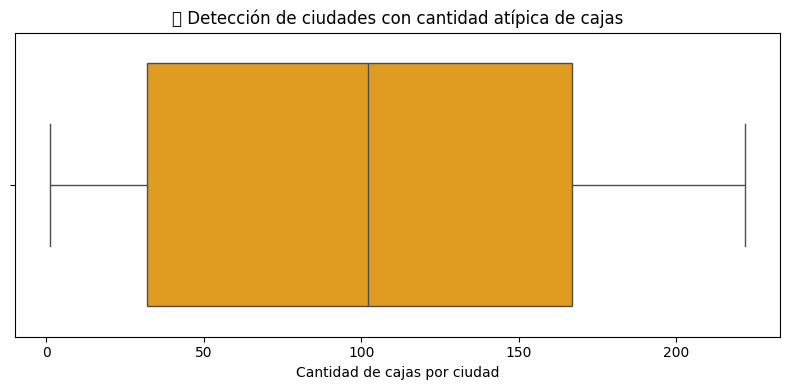

In [62]:
# 📦 Conteo de cajas por ciudad
conteo_ciudad = df['ciudad'].value_counts()

# 📈 Visualizar posibles outliers en frecuencias
plt.figure(figsize=(8, 4))
sns.boxplot(x=conteo_ciudad.values, color='orange')
plt.title("📦 Detección de ciudades con cantidad atípica de cajas")
plt.xlabel("Cantidad de cajas por ciudad")
plt.tight_layout()
plt.show()


## 6️⃣ Conclusiones e Insights

Esta sección resume los hallazgos clave del análisis exploratorio. Se detallan los patrones más importantes observados en los datos, las implicaciones para el desarrollo del modelo de IA, y se proponen recomendaciones de preprocesamiento y próximos pasos.

### 📌 Hallazgos principales

1. **Predominio de ciertos colores de buffer**: Algunos colores como `CAF`, `AZU` y `VER` son los más frecuentes, mientras que otros aparecen muy poco, lo cual puede influir en el balance de clases para validación automática.

2. **Concentración geográfica**: La mayoría de las cajas se concentran en una sola ciudad (`UIO`), lo que podría generar un sesgo en el modelo si se entrena solo con estos datos.

3. **Alta repetición de nodos concentradores y estándar**: Se identifican nodos que aparecen significativamente más que otros, lo cual podría usarse como feature de importancia o como señal de redundancia.

4. **Combinaciones duplicadas entre caja y color**: Se detectaron combinaciones exactas que podrían indicar errores en el etiquetado físico.

5. **Pocas rutas atípicas**: La mayoría de las rutas están bien distribuidas, pero algunas aparecen muy pocas veces y podrían ser casos extremos o errores de captura.

6. **Distribuciones multivariadas claras**: Se identificaron patrones al cruzar ciudad, ruta y color, útiles para clasificación supervisada y validación automatizada.



### 🛠️ Recomendaciones de Preprocesamiento

- Validar manualmente las combinaciones duplicadas de `caja_codigo` + `color_buffer`.
- Etiquetar registros con colores no válidos para su revisión o exclusión.
- Balancear clases si se construirá un modelo supervisado con `color_buffer` como objetivo.
- Considerar codificación de variables categóricas (`One-Hot` o `Label Encoding`).
- Filtrar outliers o rutas atípicas si afectan la generalización del modelo.



### 🚀 Próximos pasos

- Iniciar el diseño del modelo de clasificación para validación automática de etiquetas.
- Evaluar algoritmos candidatos (Random Forest, SVM, Redes Neuronales, etc.).
- Integrar un pipeline de preprocesamiento y entrenamiento.
- Considerar despliegue futuro con visión computacional si se integran imágenes físicas de las etiquetas.



## 🗂️ Anexo: Dataset utilizado

**Nombre del archivo:** `dataset_etiquetas_cajas_mpls.csv`  
**Ubicación:** Repositorio del proyecto > `data/samples/`

### 📑 Descripción

Este archivo contiene más de 1000 registros reales de etiquetas MPLS extraídas de las cajas de red utilizadas en proyectos de fibra óptica. Cada registro representa una etiqueta codificada con información como:

- Ciudad (`ciudad`)
- Nodo concentrador (`nodo_concentrador`)
- Nodo estándar (`nodo_estandar`)
- Nodo backup (`nodo_backup`)
- Ruta (`ruta`)
- Código de caja (`caja_codigo`)
- Color del buffer (`color_buffer`)

### 🔍 Fuente

Los datos fueron proporcionados por el equipo de operaciones de campo de la empresa de telecomunicaciones que participa en este proyecto. Se extrajeron directamente desde sus sistemas internos de gestión de infraestructura.

### 🧠 Contexto

Las etiquetas son utilizadas en campo para la identificación física de cajas de red MPLS. El análisis exploratorio de estos datos permite establecer la base para desarrollar un modelo de IA capaz de validar automáticamente dichas etiquetas, detectar errores y reducir inconsistencias operativas.
